In [14]:
import control
import numpy as np
import matplotlib.pyplot as plt

### Create discrete transfer function

In [15]:
a0 = -1.0
a2 = 0.5
b0 = 2.0
b1 = -1.0

num = [b0,b1,0]
den = [a0,0,a2]
sys_tf = control.tf(num, den, True)
sys_tf

TransferFunction(array([ 2., -1.,  0.]), array([-1. ,  0. ,  0.5]), True)

### Compute the poles

In [12]:
zp = sys_tf.pole()
zp

array([-0.5+0.5j, -0.5-0.5j])

### Check if all the poles lie inside the unit circle ,ie, if $|z| < 1$

In [13]:
stable = all([abs(p)<1 for p in zp])
print('The system is stable: ', stable)

The system is stable:  True


### Plot the poles and zeros

(array([-0.70710678+0.j,  0.70710678+0.j]), array([0.5+0.j, 0. +0.j]))

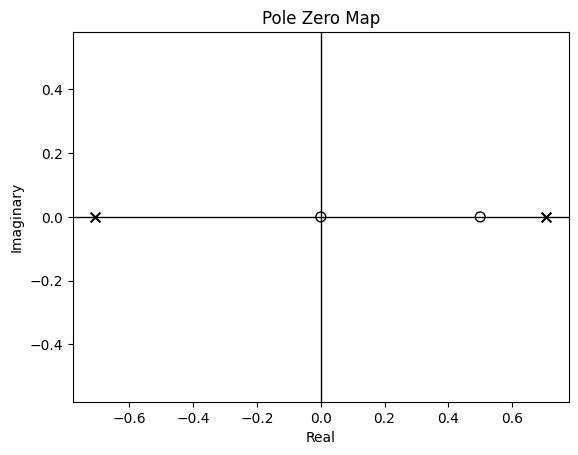

In [15]:
control.pzmap(sys_tf)

### Plot the impulse response

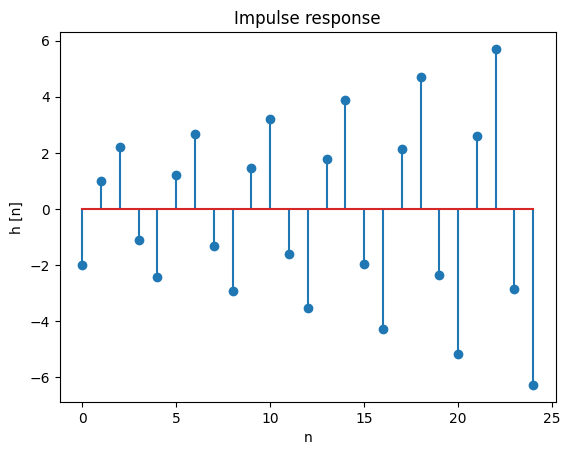

In [83]:
T, result = control.impulse_response(sys_tf, T=np.arange(25))
plt.stem(T, result)
plt.xlabel('n')
plt.ylabel('h [n]')
plt.title('Impulse response')
plt.show()

In [33]:
sys_tf.isdtime()

True

### Try modifying the system to make it unstable 

A causal D.T tf becomes unstable ifa pole is on or outide the unit circle,ie, $|z|>=1$ . For this specific, it can be shown that $|z|>=1$ if $\frac{a_2}{a_0} >= 1$

Stability:  False


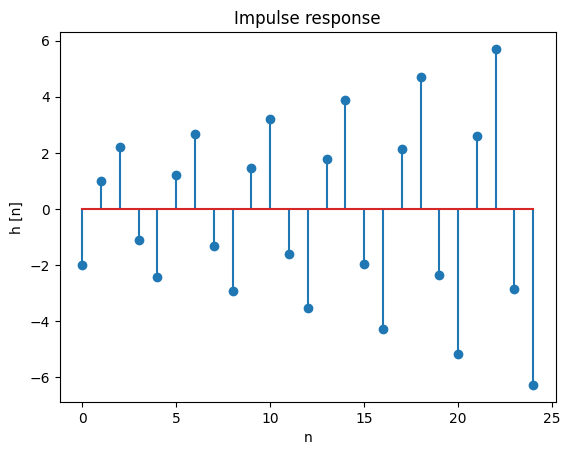

In [90]:
a0 = -1.0
a2 = -1.1
b0 = 2.0
b1 = -1.0

num = [b0,b1,0]
den = [a0,0,a2]
sys_tf = control.tf(num, den, True)

zp = sys_tf.pole()
stable = all([abs(p)<1.0 for p in zp])
print('Stability: ', stable)

# plot the impulse response to see if it's unstable
T, result = control.impulse_response(sys_tf, T=np.arange(25))
plt.stem(T, result)
plt.xlabel('n')
plt.ylabel('h [n]')
plt.title('Impulse response')
plt.show()

# Cascaded systems

In [101]:
num = [1,-1]
den = [1,0]
sys_tf_2 = control.tf(num, den, True)
sys_tf_2

TransferFunction(array([ 1, -1]), array([1, 0]), True)

### Connect 2 systems in series

In [102]:
sys_tf_3 = control.series(sys_tf, sys_tf_2)
sys_tf_3

TransferFunction(array([ 2., -3.,  1.,  0.]), array([-1. ,  0. ,  0.5,  0. ]), True)

### a) Plot impulse repsonse of the combined system

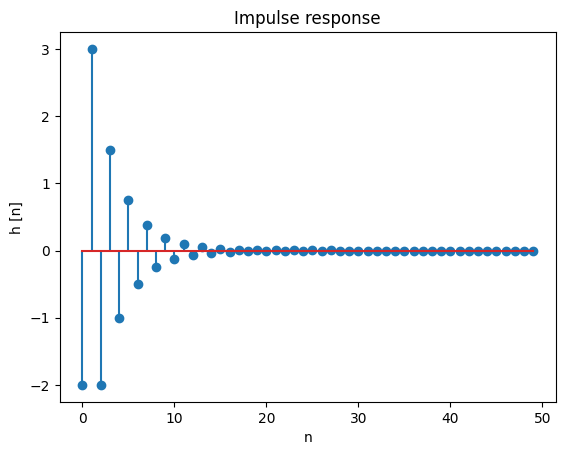

In [128]:
T, result = control.impulse_response(sys_tf_3, T=np.arange(50))
plt.stem(T, result)
plt.xlabel('n')
plt.ylabel('h [n]')
plt.title('Impulse response')
plt.show()

### b) Compute the impulse repsonses individually and then combine using convolution

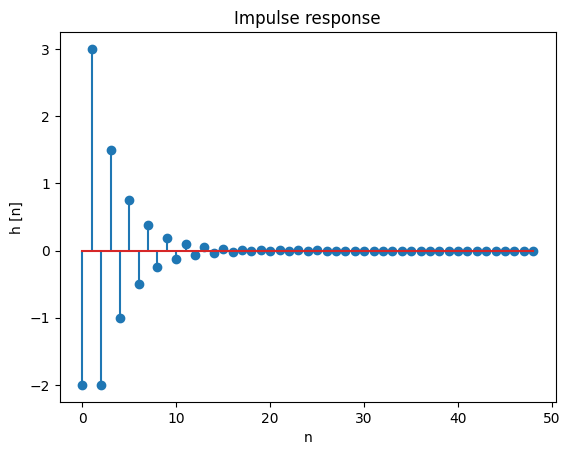

In [127]:
T, result1 = control.impulse_response(sys_tf, T=np.arange(25))
T, result2 = control.impulse_response(sys_tf_2, T=np.arange(25))

result3 = np.convolve(result1, result2)
T = range(len(result3))

plt.stem(T, result3)
plt.xlabel('n')
plt.ylabel('h [n]')
plt.title('Impulse response')
plt.show()

# Waste

In [3]:
num = [1,0]
den = [1,-0.8]
sys_tf = control.tf(num, den, True)
sys_tf

TransferFunction(array([1, 0]), array([ 1. , -0.8]), True)

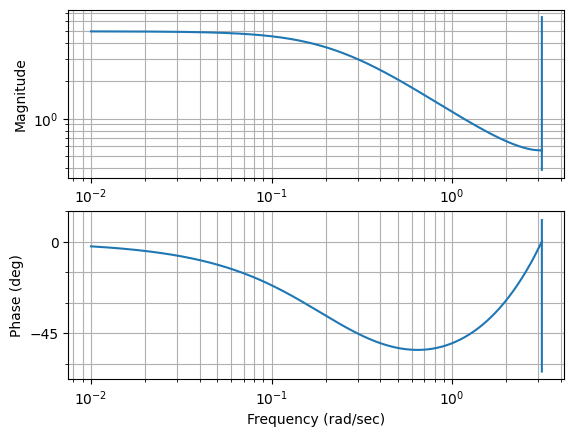

In [14]:
mag, phase, omega = control.bode(sys_tf)
omega = (np.pi / 10.0)
mag, phase, omega = control.freqresp(sys_tf, omega)

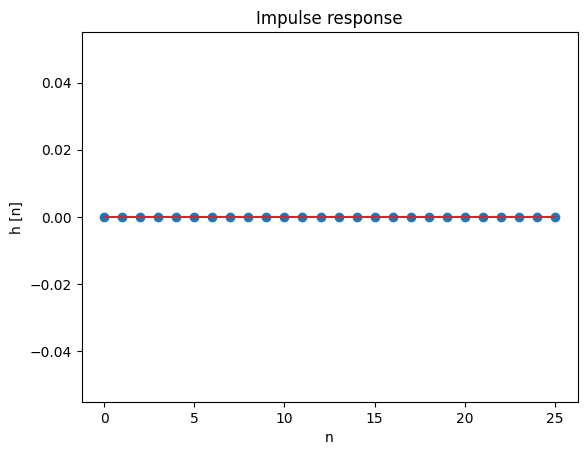

In [8]:
T, result = control.initial_response(sys_tf)
plt.stem(T, result)
plt.xlabel('n')
plt.ylabel('h [n]')
plt.title('Impulse response')
plt.show()